# Necessary Libraries

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.tree import DecisionTreeRegressor


# Pre-Processing

In [45]:
data = '/content/Housing.csv'

In [46]:
df = pd.read_csv(data)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [47]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# One hot Encoding

In [48]:
data_encoded = pd.get_dummies(df, drop_first=True)

# Correlation Martix

In [49]:
correlation_matrix = data_encoded.corr()
price_correlation = correlation_matrix["price"].sort_values(ascending=False)
print(price_correlation)

price                              1.000000
area                               0.535997
bathrooms                          0.517545
airconditioning_yes                0.452954
stories                            0.420712
parking                            0.384394
bedrooms                           0.366494
prefarea_yes                       0.329777
mainroad_yes                       0.296898
guestroom_yes                      0.255517
basement_yes                       0.187057
hotwaterheating_yes                0.093073
furnishingstatus_semi-furnished    0.063656
furnishingstatus_unfurnished      -0.280587
Name: price, dtype: float64


# Heat Map

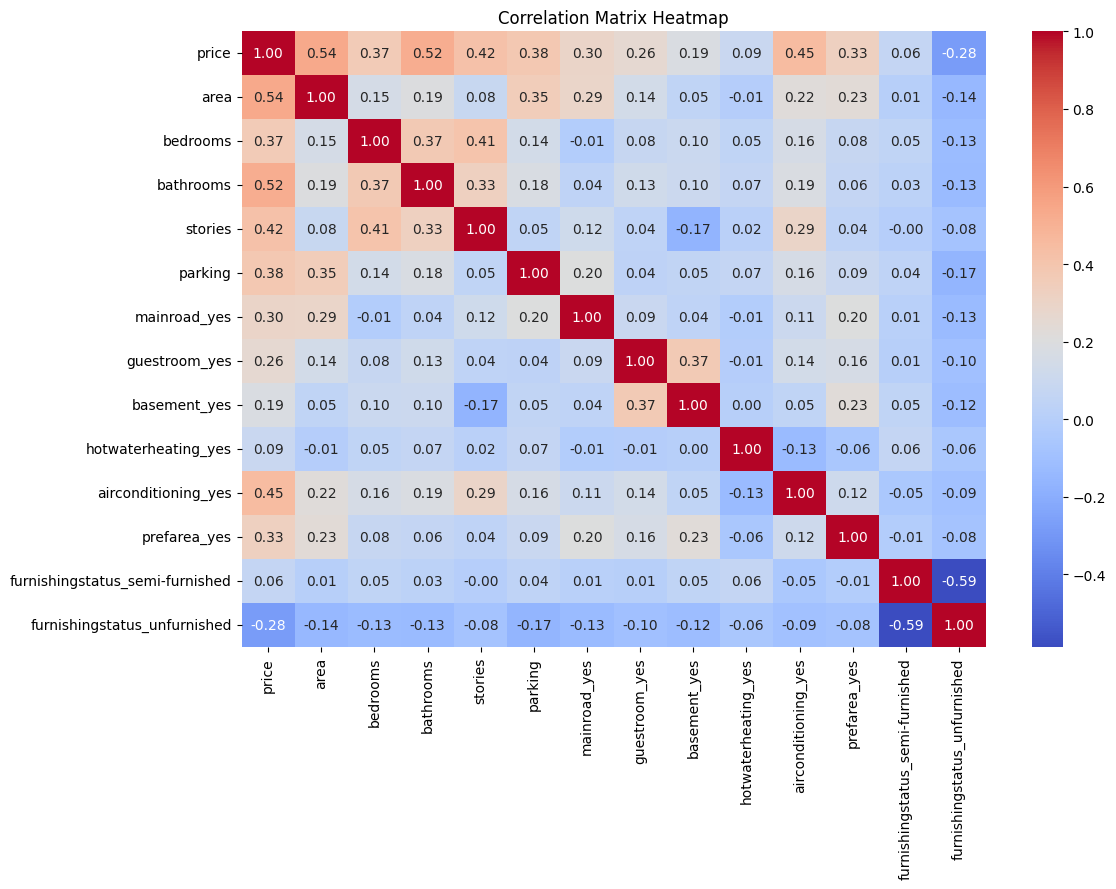

In [50]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [51]:
x = data_encoded.drop(columns = ['price'])
y = data_encoded['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state= 42)

# Linear Registration

In [52]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [53]:
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred)

mse, rmse, mape

(1754318687330.6638, 1324506.9600914386, 0.2103552331079955)

# Decision Tree Regressor

In [54]:
dt_model = DecisionTreeRegressor(random_state=42)

In [55]:
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)

In [57]:
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = mean_squared_error(y_test, y_pred_dt, squared=False)
mape_dt = mean_absolute_percentage_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

mse_dt, rmse_dt, mape_dt, r2_dt

(2642802637614.6787, 1625669.904259373, 0.2492963902139381, 0.4771459275854347)

# Visualisation

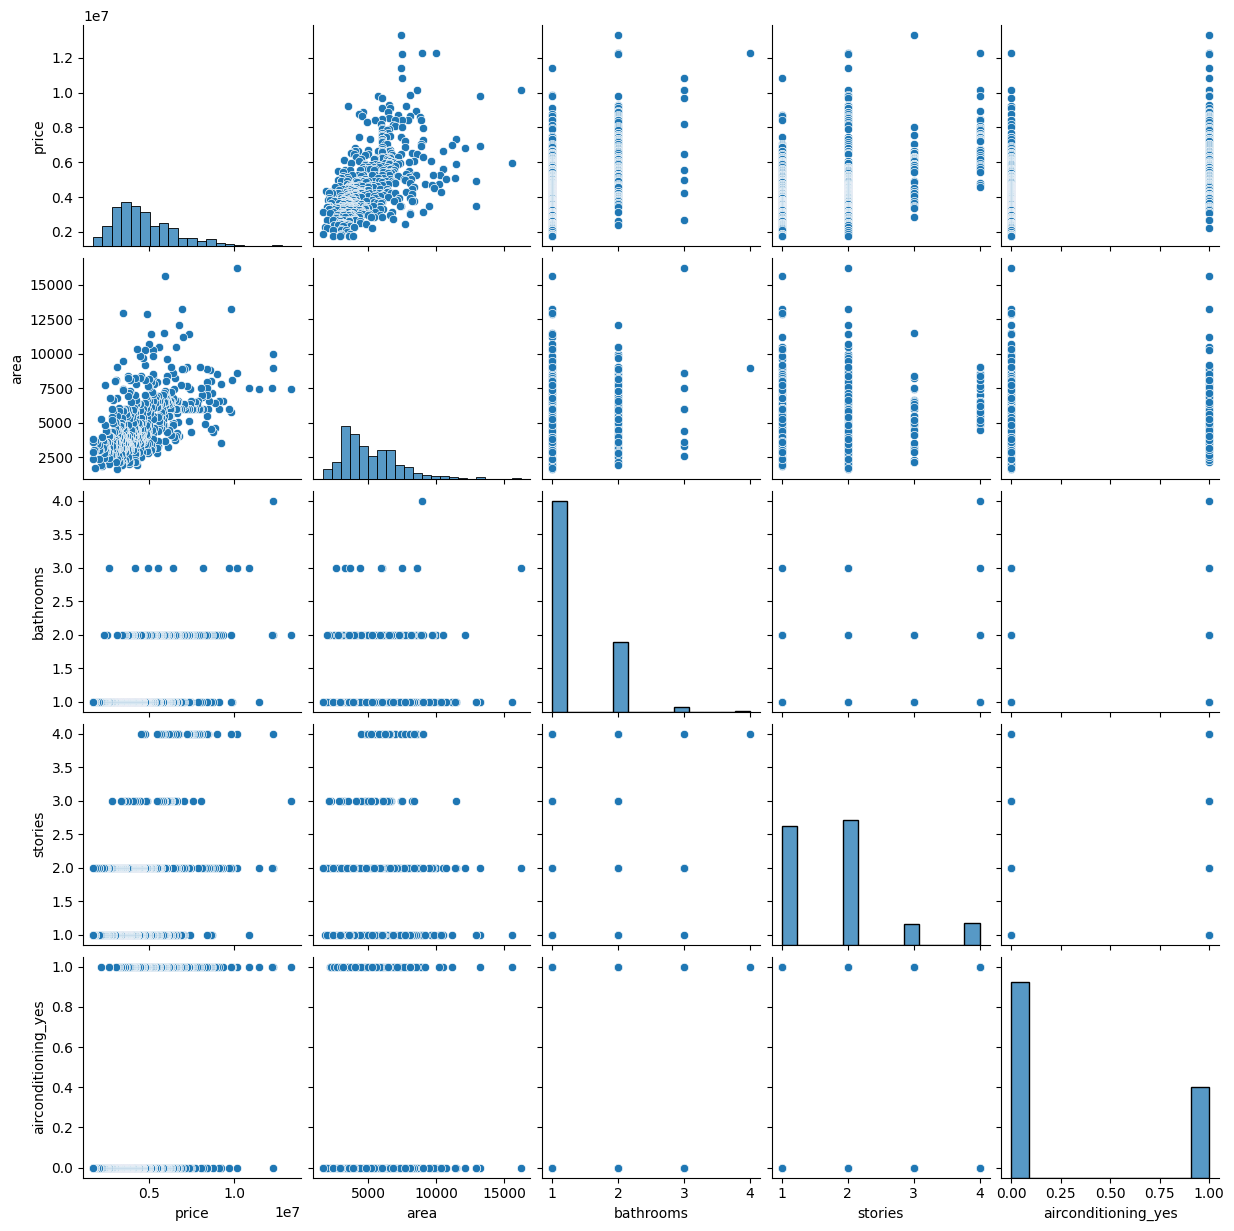

In [64]:
subset_data = data_encoded[['price', 'area', 'bathrooms', 'stories', 'airconditioning_yes']]
sns.pairplot(subset_data)
plt.show()

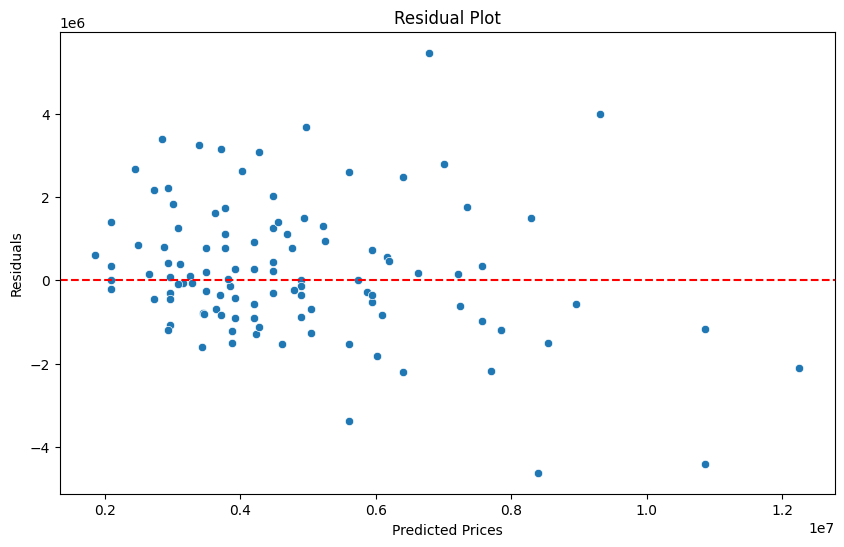

In [73]:
residuals = y_test - y_pred_dt

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_dt, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

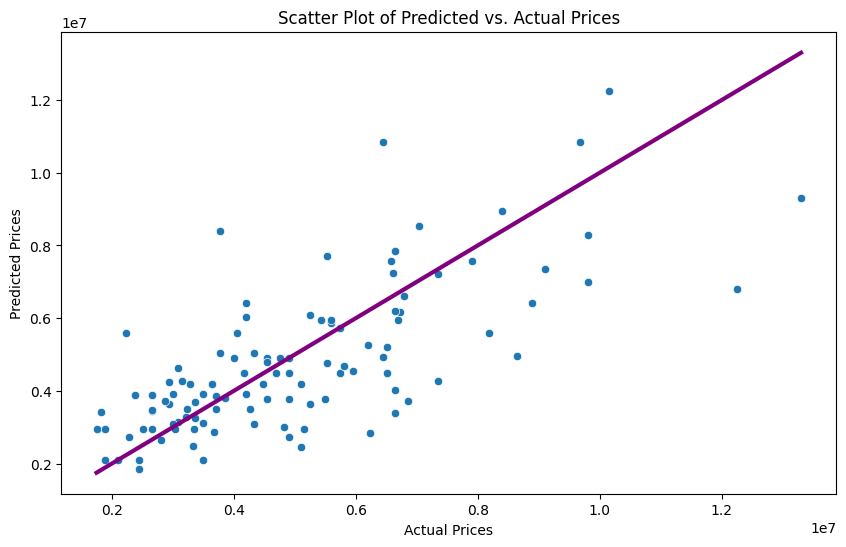

In [71]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_dt)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='purple', lw=3)  # Line for perfect prediction
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Scatter Plot of Predicted vs. Actual Prices')
plt.show()
